In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format='svg'

import numpy as np
np.set_printoptions(precision=6, suppress=True)
np.set_printoptions(threshold=np.inf)

import shl_scripts.shl_tools
from shl_scripts.shl_experiments import SHL

import DNN.mnist_loader as data_loader
import DNN.network as network
from shl_scripts.shl_encode import sparse_encode

In [2]:
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [3]:
training_data,validation_data,test_data=data_loader.load_data()
training_image = training_data[0]
training_supervision = training_data[1]
test_image = test_data[0]
test_supervision = test_data[1]

In [4]:
tag ='2017-05-26_MNIST_MEUL_'
DEBUG_DOWNSCALE, verbose = 1, 10
tag ='2017-05-30_MNIST_MEUL_DEBUG_'
DEBUG_DOWNSCALE, verbose = 10, 10
patch_size = (28,28)
n_dictionary = 15**2
l0_sparseness = 7
n_iter = 2**14
eta = 0.01
eta_homeo = 0.01
verbose = 0
list_figures=['show_dico']
n_hidden = 100

 ----- learning for the dico of size : 144 -----
Epoch 0: 5633 / 10000
Epoch 1: 5916 / 10000
Epoch 2: 5858 / 10000
Epoch 3: 5830 / 10000
Epoch 4: 5851 / 10000
Epoch 5: 5848 / 10000
Epoch 6: 5940 / 10000
Epoch 7: 5835 / 10000
Epoch 8: 5845 / 10000
Epoch 9: 5808 / 10000
Epoch 10: 5748 / 10000
Epoch 11: 5727 / 10000
Epoch 12: 5783 / 10000
Epoch 13: 5832 / 10000
Epoch 14: 5730 / 10000
Epoch 15: 5820 / 10000
Epoch 16: 5792 / 10000
Epoch 17: 5807 / 10000
Epoch 18: 5858 / 10000
Epoch 19: 5775 / 10000
Epoch 20: 5757 / 10000
Epoch 21: 5729 / 10000
Epoch 22: 5757 / 10000
Epoch 23: 5745 / 10000
Epoch 24: 5781 / 10000
Epoch 25: 5808 / 10000
Epoch 26: 5723 / 10000
Epoch 27: 5778 / 10000
Epoch 28: 5873 / 10000
Epoch 29: 5815 / 10000
 ----- learning for the dico of size : 225 -----
Epoch 0: 3567 / 10000
Epoch 1: 4464 / 10000
Epoch 2: 4258 / 10000
Epoch 3: 4268 / 10000
Epoch 4: 4107 / 10000
Epoch 5: 4307 / 10000
Epoch 6: 4199 / 10000
Epoch 7: 4156 / 10000
Epoch 8: 4140 / 10000
Epoch 9: 4133 / 10000
Ep

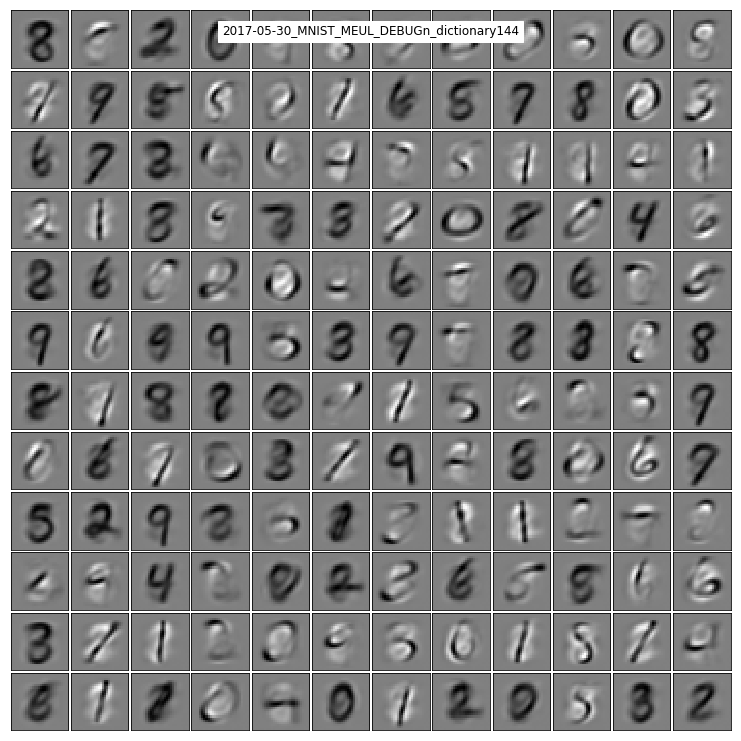

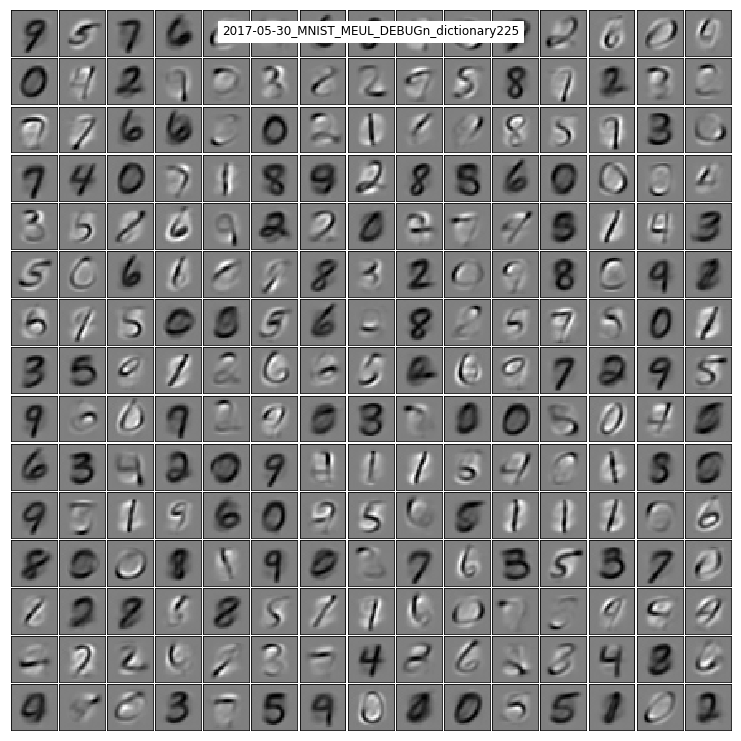

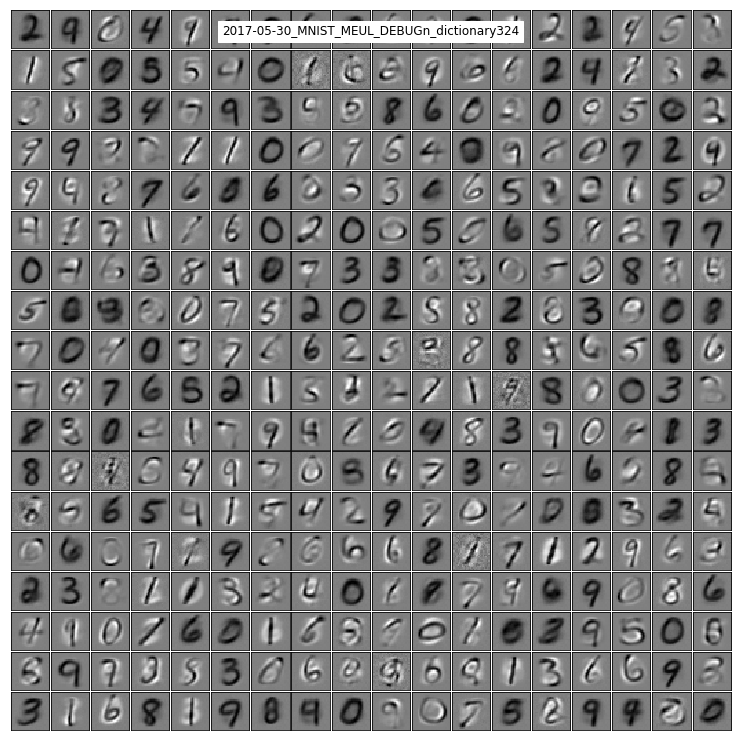

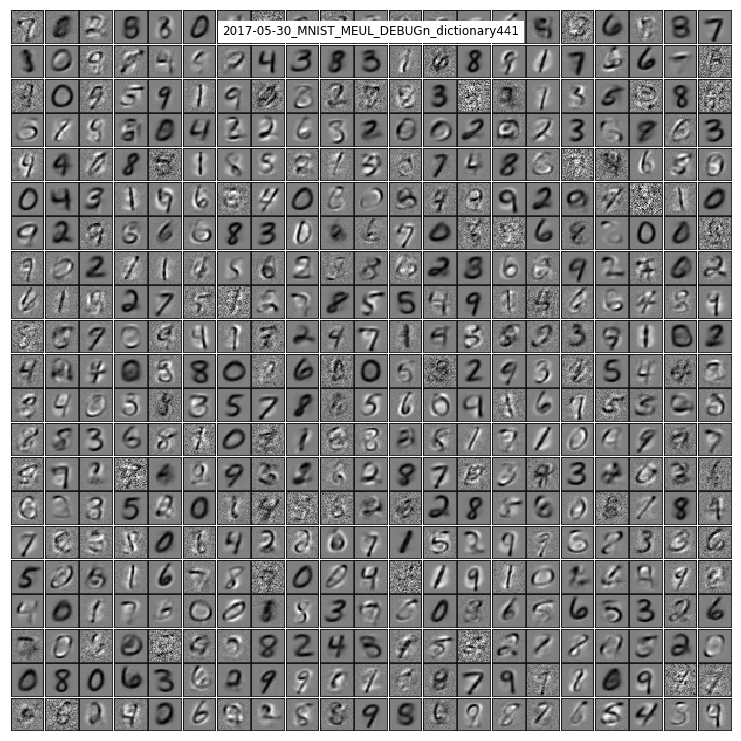

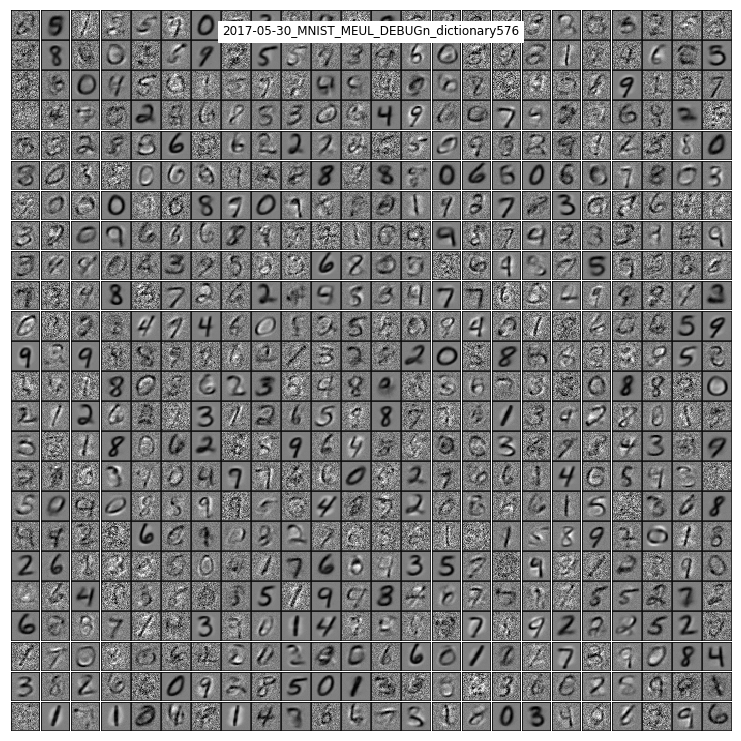

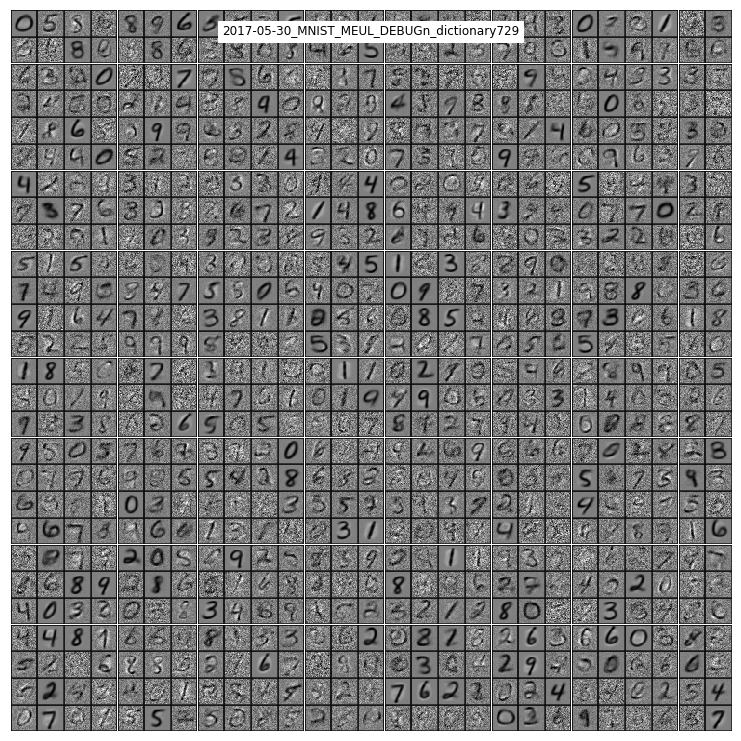

In [5]:
for n_dictionary_ in np.arange(12, 30, 3)**2:
    
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
                eta=eta, eta_homeo=eta_homeo, verbose=verbose,
                n_iter=n_iter, patch_size=patch_size, l0_sparseness=l0_sparseness,
                n_dictionary=n_dictionary_)
    matname = tag + 'n_dictionary' + str(n_dictionary_)
    dico = shl.learn_dico(data=training_image, matname=matname,list_figures=list_figures)    
    ## formating the date to fit theano standard
    training_sparse_vector = shl.code(data=training_image, dico=dico, matname=matname)

    test_sparse_vector = sparse_encode(test_image, dico.dictionary, algorithm = shl.learning_algorithm,
                                l0_sparseness=l0_sparseness, fit_tol = None,
                                P_cum = dico.P_cum, verbose = 0)
    wrapped_training_data = (training_sparse_vector, training_supervision)
    wrapped_test_data = (test_sparse_vector, test_supervision)
    
    wrapped_inputs = [np.reshape(x, (n_dictionary_, 1)) for x in wrapped_training_data[0]]
    wrapped_results = [vectorized_result(y) for y in wrapped_training_data[1]]
    wrapped_training_data = zip(wrapped_inputs, wrapped_results)
    wrapped_test_inputs = [np.reshape(x, (n_dictionary_, 1)) for x in wrapped_test_data[0]]
    wrapped_test_data_final = zip(wrapped_test_inputs, wrapped_test_data[1])
    
    print(" ----- learning for the dico of size : {0} -----".format(n_dictionary_))
    ## running the network
    net=network.Network([n_dictionary_, n_hidden, 10])
    net.SGD(training_data=wrapped_training_data,
       epochs=30,
       mini_batch_size=10,
       eta=3.0,
       test_data=wrapped_test_data_final)


 ----- learning for the dico of sparseness: 7 -----
Epoch 0: 3293 / 10000
Epoch 1: 3587 / 10000
Epoch 2: 3551 / 10000
Epoch 3: 3610 / 10000
Epoch 4: 3643 / 10000
Epoch 5: 3615 / 10000
Epoch 6: 3615 / 10000
Epoch 7: 3609 / 10000
Epoch 8: 3521 / 10000
Epoch 9: 3525 / 10000
Epoch 10: 3550 / 10000
Epoch 11: 3497 / 10000
Epoch 12: 3498 / 10000
Epoch 13: 3477 / 10000
Epoch 14: 3430 / 10000
Epoch 15: 3478 / 10000
Epoch 16: 3472 / 10000
Epoch 17: 3500 / 10000
Epoch 18: 3445 / 10000
Epoch 19: 3455 / 10000
Epoch 20: 3419 / 10000
Epoch 21: 3388 / 10000
Epoch 22: 3383 / 10000
Epoch 23: 3403 / 10000
Epoch 24: 3409 / 10000
Epoch 25: 3335 / 10000
Epoch 26: 3402 / 10000
Epoch 27: 3371 / 10000
Epoch 28: 3358 / 10000
Epoch 29: 3345 / 10000
 ----- learning for the dico of sparseness: 7 -----
Epoch 0: 3695 / 10000
Epoch 1: 4304 / 10000
Epoch 2: 4591 / 10000
Epoch 3: 4654 / 10000
Epoch 4: 4685 / 10000
Epoch 5: 4713 / 10000
Epoch 6: 4696 / 10000
Epoch 7: 4669 / 10000
Epoch 8: 4594 / 10000
Epoch 9: 4601 / 10

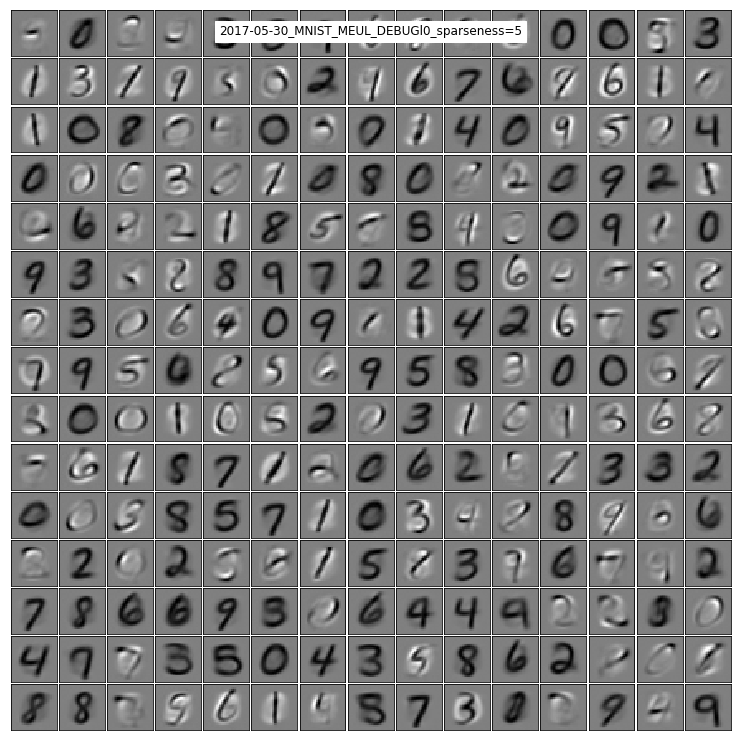

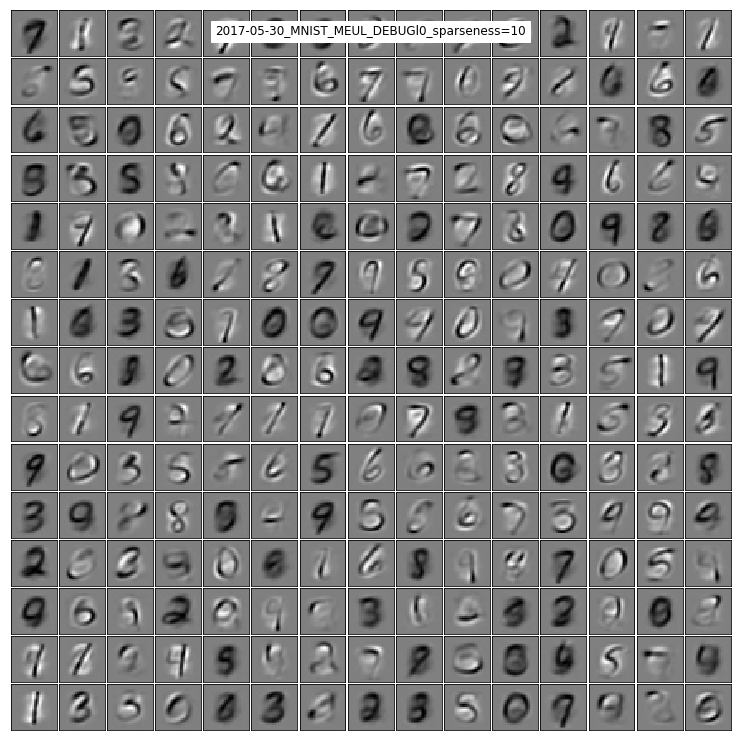

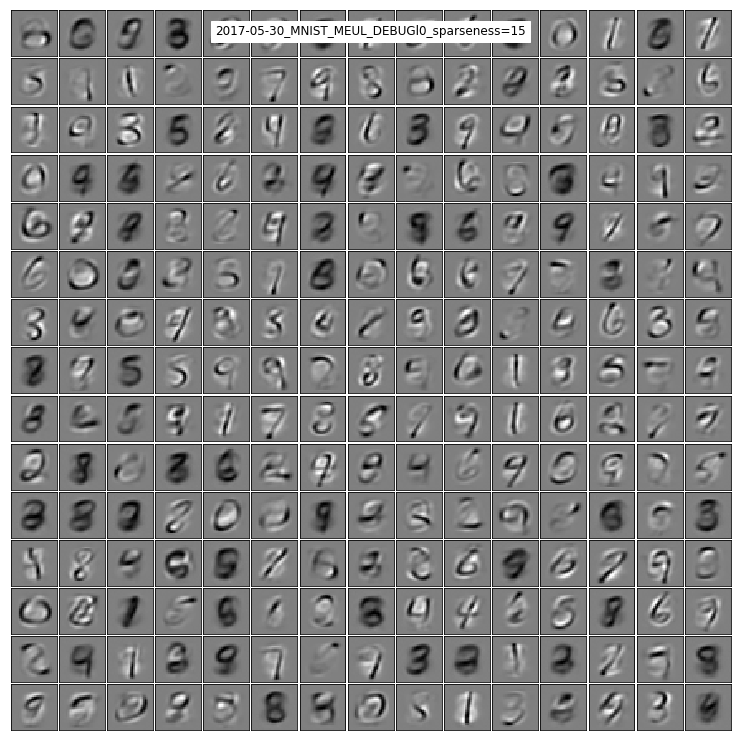

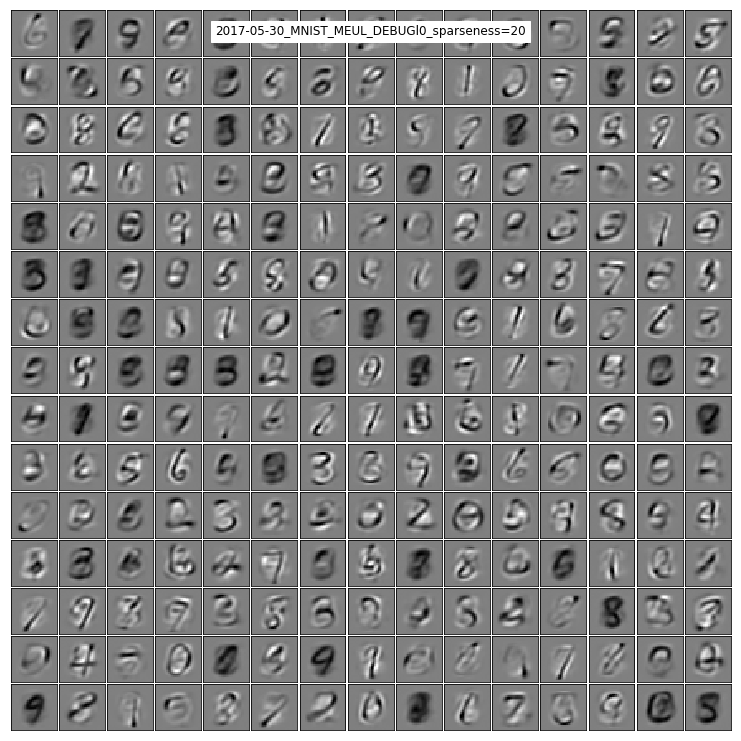

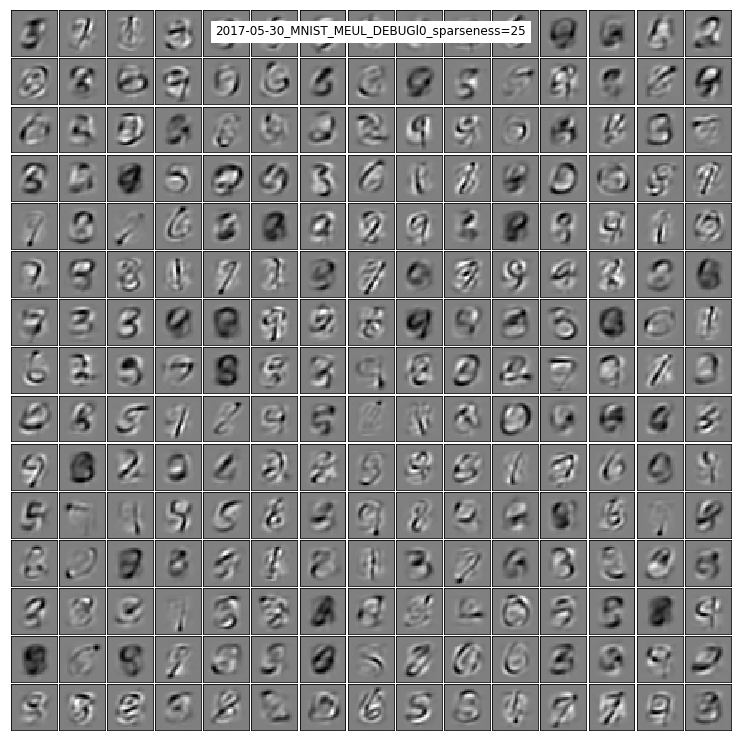

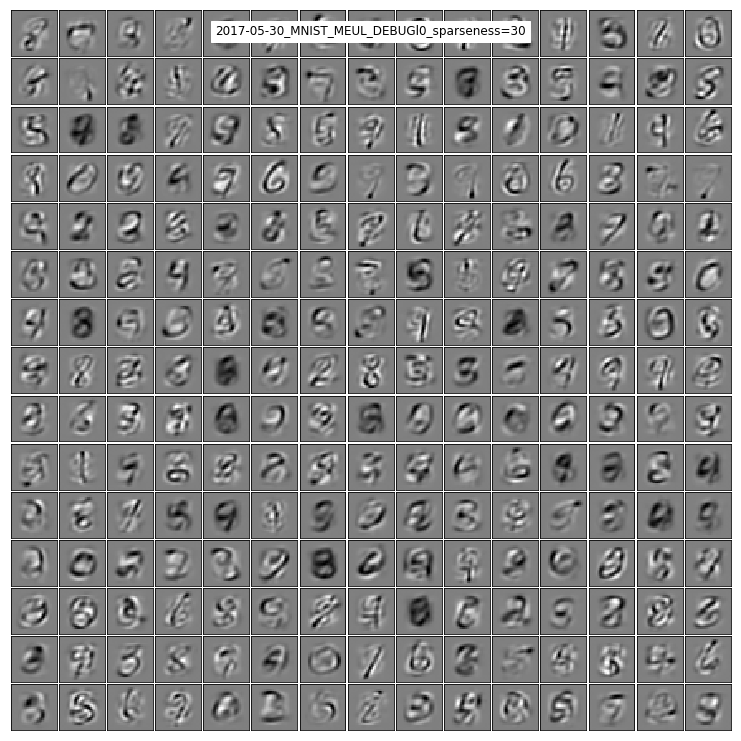

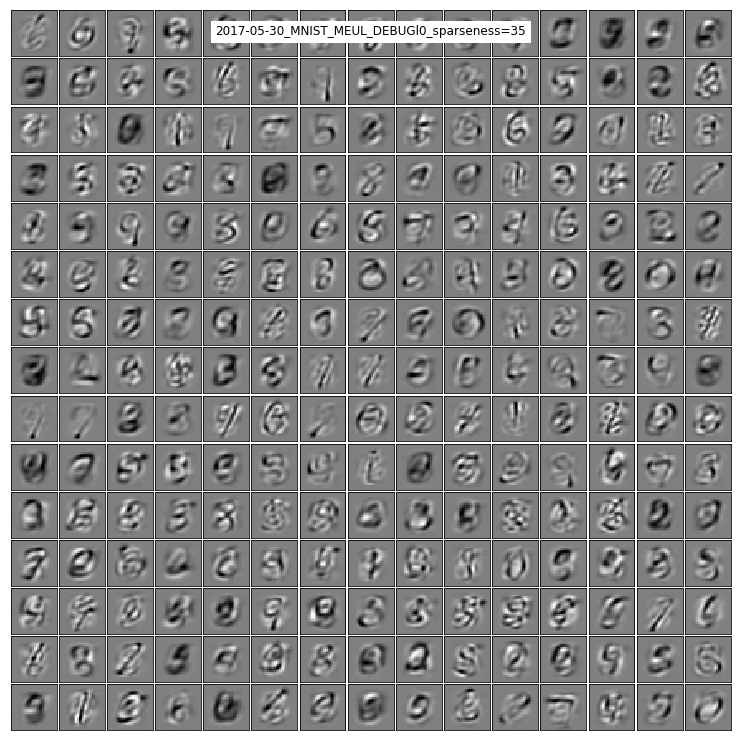

In [6]:
for l0_sparseness_ in np.arange(5, 40, 5):
    
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
                eta=eta, eta_homeo=eta_homeo, verbose=verbose,
                n_iter=n_iter, patch_size=patch_size, l0_sparseness=l0_sparseness_,
                n_dictionary=n_dictionary)
    matname = tag + 'l0_sparseness=' + str(l0_sparseness_)
    dico = shl.learn_dico(data=training_image,matname=matname, list_figures=list_figures)
    
    training_sparse_vector = shl.code(data=training_image, dico=dico, matname=matname)
    
    test_sparse_vector = sparse_encode(test_image, dico.dictionary, algorithm=shl.learning_algorithm,
                                l0_sparseness=l0_sparseness_, fit_tol=None,
                                P_cum=dico.P_cum, verbose = 0)
    wrapped_training_data = (training_sparse_vector, training_supervision)
    wrapped_test_data = (test_sparse_vector, test_supervision)
    
    wrapped_inputs = [np.reshape(x, (shl.n_dictionary, 1)) for x in wrapped_training_data[0]]
    wrapped_results = [vectorized_result(y) for y in wrapped_training_data[1]]
    wrapped_training_data = zip(wrapped_inputs, wrapped_results)
    wrapped_test_inputs = [np.reshape(x, (shl.n_dictionary, 1)) for x in wrapped_test_data[0]]
    wrapped_test_data_final = zip(wrapped_test_inputs, wrapped_test_data[1])
    
    print(" ----- learning for the dico of sparseness: {0} -----".format(l0_sparseness_))
    ## running the network
    net=network.Network([shl.n_dictionary, n_hidden, 10])
    net.SGD(training_data=wrapped_training_data,
       epochs=30,
       mini_batch_size=10,
       eta=3.0,
       test_data=wrapped_test_data_final)